In [305]:
import numpy as np
import tensorflow as tf

sess = tf.InteractiveSession()

X = [i for i in range(0, 100)]
E = [8*np.random.normal() for i in range(0, len(X))]
Y = [2*X[i] - 3 + E[i] for i in range(0, len(X))]

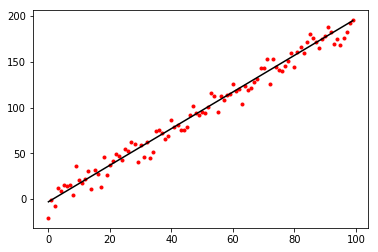

In [306]:
import matplotlib.pyplot as plt

plt.plot(X, Y, 'r.')
plt.plot(X, np.array(Y) - np.array(E), 'k')
plt.show()

In [307]:
def preprocessData(X, Y):
    # preprocesses data
    
    n_samples = len(X)
    
    if min(X) < 0:          
        X = np.array(X) - [min(np.array(X))]*len(X)
    
    if max(Y) < 0:
        Y = [-Y[i] for i in range(0, len(Y))]
    
    if (Y[0] > Y[n_samples // 2] and Y[n_samples // 2] > Y[n_samples - 1]) or (Y[0] < Y[n_samples // 2] and Y[n_samples - 1] < Y[n_samples // 2]):
        Y = [-Y[i] for i in range(0, len(Y))]
        
    X = list(X)
    Y = list(Y)
    
    threshold = 50
    
    X1 = X
    Y1 = Y
    
    if len(X) < threshold:
        while len(X) < threshold and len(Y) < threshold:
            X = X + [X1[np.random.randint(0, len(X1))]]
            Y = Y + [Y1[np.random.randint(0, len(Y1))]]
            
    X = X + [-X[i] for i in range(0, len(X))]
    Y = Y + [-Y[i] for i in range(0, len(Y))]
            
 # All the above three if cases manipulate the input data such that the model can find the degree more       convenietly 

    X = np.array(X)
    Y = np.array(Y)
    
    X = np.reshape(X, (len(X), 1))
    Y = np.reshape(Y, (len(Y), 1))
    
    return X, Y

In [308]:
def buildModel():                        # Builds polynomial net model with layers with exponential output
    import keras
    
    from keras.models import Model
    from keras.layers import Input, Dense, Lambda, multiply, add
    
    a = tf.Variable(1.0)
    b = tf.Variable(1.0)
    n = tf.Variable(1.0)
    
    x = Input(shape=(1,))
    
    j1 = 4.5
    j2 = 20.
    
    k1 = 4.5
    k2 = 20.
    
    dense_a = Dense(2, kernel_initializer='glorot_normal', bias_initializer='glorot_normal')(x)
    powered_dense1 = Lambda(lambda x: tf.abs(-j1*tf.sigmoid(j2*a)*x**2 - k1*tf.sigmoid(k2*b))**(n/8.0))(Dense(1, kernel_initializer='glorot_normal', bias_initializer='glorot_normal')(dense_a))
    model1 = Model(x, powered_dense1)
    model1.layers[-1].trainable_weights.extend([a, b, n])
    
    dense_b = Dense(2, kernel_initializer='glorot_normal', bias_initializer='glorot_normal')(x)
    powered_dense2 = Lambda(lambda x: tf.abs(-j1*tf.sigmoid(j2*a)*x**2 - k1*tf.sigmoid(k2*b))**(n/8.0))(Dense(1, kernel_initializer='glorot_normal', bias_initializer='glorot_normal')(dense_b))
    model2 = Model(x, powered_dense2)
    model2.layers[-1].trainable_weights.extend([a, b, n])
    
    

                                        # "n" is the parameter representing the degree
                                                              
                                # We initialize all weights and biases in the dense layers using
                                # the Glorot or Xavier normal Initializer
                                                     
                                                     
    dense_c = Dense(2, kernel_initializer='glorot_normal', bias_initializer='glorot_normal')(x)
    powered_dense3 = Lambda(lambda x: tf.abs(j1*tf.sigmoid(j2*a)*x**2 + k1*tf.sigmoid(k2*b))**(n/8.0))(Dense(1, kernel_initializer='glorot_normal', bias_initializer='glorot_normal')(dense_c))
    model3 = Model(x, powered_dense3)
    model3.layers[-1].trainable_weights.extend([a, b, n])

    dense_d = Dense(2, kernel_initializer='glorot_normal', bias_initializer='glorot_normal')(x)
    powered_dense4 = Lambda(lambda x: tf.abs(j1*tf.sigmoid(j2*a)*x**2 + k1*tf.sigmoid(k2*b))**(n/8.0))(Dense(1, kernel_initializer='glorot_normal', bias_initializer='glorot_normal')(dense_d))
    model4 = Model(x, powered_dense4)
    model4.layers[-1].trainable_weights.extend([a, b, n])
    
    exponentialLayers = multiply([model1.output, model2.output, model3.output, model4.output])
    
    model = Model(x, exponentialLayers)
    model.layers[-1].trainable_weights.extend([a, b, n])
    
    return model, n

In [309]:
def trainModel(X, Y, model):                        # fits model to data
    model.fit(X, Y, epochs=1, verbose=0)

In [310]:
def predictDegree(X, Y):  
                                              # Predicts degree of polynomial relationship between X and Y
    constant = 15000
    X_list = np.reshape(X, (len(X)))
    epochs = constant//(len(X_list))
    
    X, Y = preprocessData(X, Y)
    model, n = buildModel()
    
    from keras.optimizers import RMSprop
    model.compile(loss='mae', optimizer=RMSprop(lr=0.01))
    
    tf.global_variables_initializer().run()
    
    for i in range(0, epochs):
        trainModel(X, Y, model)   
        i = i + 1
        
    return np.int32(np.round(sess.run(n)))   # return rounded degree   

In [311]:
import time

startTime = time.time()
print("Degree of polynomial relationship : " + str(predictDegree(X, Y)) + " (if there is a polynomial relationship)")
endTime = time.time()
print("Time taken : " + str(endTime - startTime) + " s")

Degree of polynomial relationship : 1 (if there is a polynomial relationship)
Time taken : 8.583256721496582 s
